In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

read img using OpenCV

In [2]:
img_bgr = cv2.imread('fruits.png')

convert BGR to RGB

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

convert to HSV

In [4]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

split channels (H, S, V)

In [5]:
H, S, V = cv2.split(img_hsv)

showing

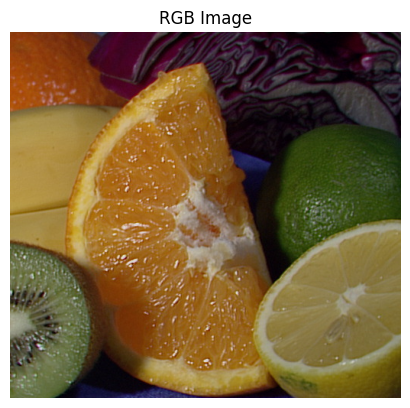

In [9]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title('RGB Image')
plt.axis('off')
plt.tight_layout()
plt.show()

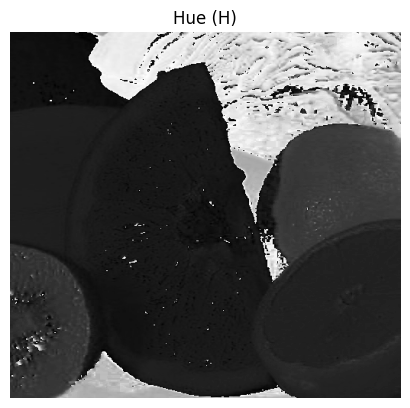

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,2)
plt.imshow(H, cmap='gray')
plt.title('Hue (H)')
plt.axis('off')
plt.tight_layout()
plt.show()

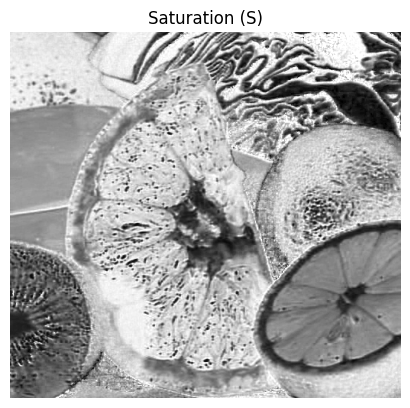

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,3)
plt.imshow(S, cmap='gray')
plt.title('Saturation (S)')
plt.axis('off')
plt.tight_layout()
plt.show()

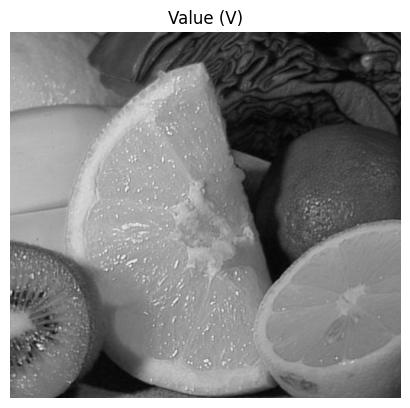

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,4)
plt.imshow(V, cmap='gray')
plt.title('Value (V)')
plt.axis('off')
plt.tight_layout()
plt.show()

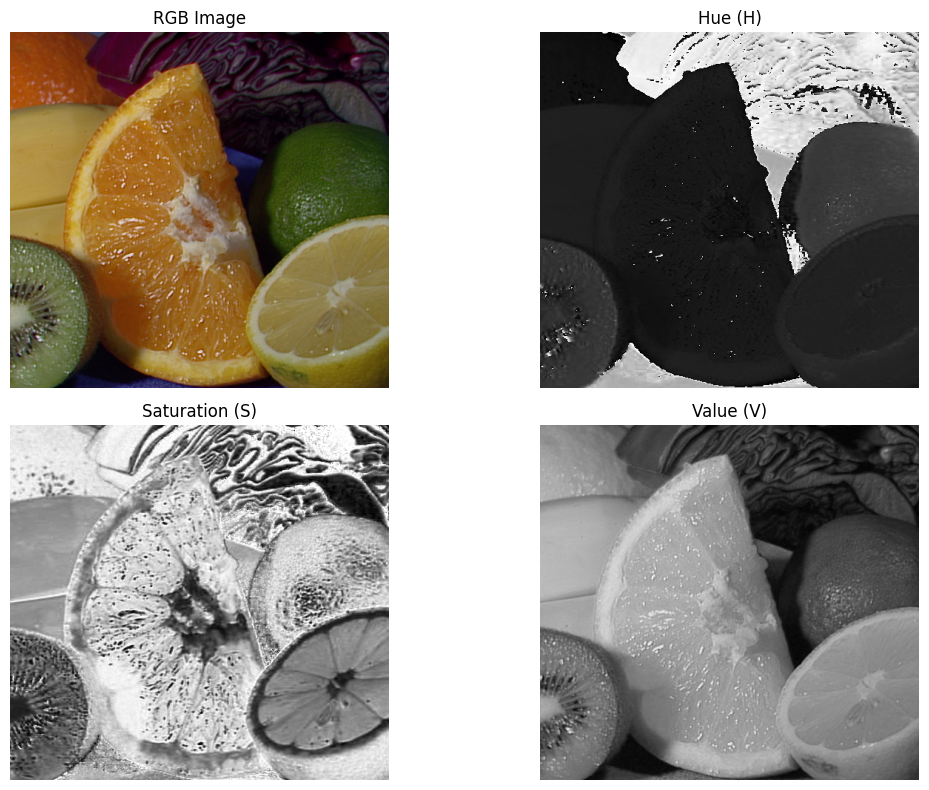

In [6]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(H, cmap='gray')
plt.title('Hue (H)')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(S, cmap='gray')
plt.title('Saturation (S)')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(V, cmap='gray')
plt.title('Value (V)')
plt.axis('off')

plt.tight_layout()
plt.show()

Numerical analysis of the characteristics of each channel

In [7]:
def channel_stats(channel, name):
    print(f"{name} channel:")
    print(f"  Min: {np.min(channel)}, Max: {np.max(channel)}, Mean: {np.mean(channel):.2f}")

channel_stats(H, "Hue")
channel_stats(S, "Saturation")
channel_stats(V, "Value")

Hue channel:
  Min: 0, Max: 179, Mean: 48.21
Saturation channel:
  Min: 0, Max: 255, Mean: 159.86
Value channel:
  Min: 0, Max: 252, Mean: 113.79


Comparison of RGB and HSI:

OpenCV does not provide a direct conversion to the HSI color model, but the HSV model can be analyzed in a similar way.

In the HSI model, the S component corresponds to the Saturation, and the I component represents Intensity, which can be approximated by calculating the average of the three RGB channels.

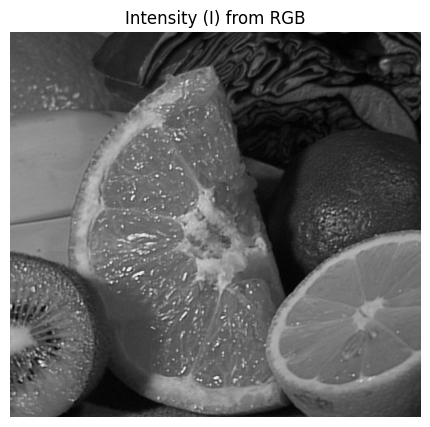

In [8]:
I = np.mean(img_rgb, axis=2).astype(np.uint8)

plt.figure(figsize=(6,5))
plt.imshow(I, cmap='gray')
plt.title('Intensity (I) from RGB')
plt.axis('off')
plt.show()

The four displayed images include the original RGB version and the three separated channels Hue (H), Saturation (S), and Value (V). In the analysis cell, we study how each component contributes to human color perception.

The Hue channel encodes the dominant wavelength—essentially the “type” of color (red, green, blue, etc.). Saturation measures how pure or intense the color is: high saturation means vivid, rich colors, while low saturation indicates faded or grayish tones. Value represents brightness, separating illumination from chromatic content. This separation allows us to analyze color independent of lighting variations—something RGB cannot do naturally, since in RGB all three components mix both color and brightness.

Comparing RGB and HSI (or HSV) models:

RGB describes colors in terms of additive light intensities, so when a color becomes less saturated (closer to gray), the distinction between hue and brightness becomes entangled. In contrast, HSI provides an intuitive representation aligned with human vision: it isolates Intensity, making recognition and processing of low-saturation or natural images (like faces, landscapes, and skin tones) more robust.

Therefore, HSI/HSV is particularly effective for natural or photographic scenes, where lighting variation plays a major role. In such cases, algorithms can adjust intensity separately without disturbing chromatic information, while RGB would distort the perceived color balance.